In [229]:
from pathlib import Path
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

In [230]:

# Pfad relativ zum Notebook-Ordner (aktuelles Working Directory)
excel_path = Path.cwd() / "Auswertung_Studie.xlsx"

# (Optional) check: existiert die Datei?
print("Gefunden:", excel_path.exists(), "-", excel_path)

# Sheets ansehen
xls = pd.ExcelFile(excel_path)
print("Sheets:", xls.sheet_names)

df_final = pd.read_excel(excel_path, sheet_name="Final", header=[0, 1])


def flatten_cols(cols):
    out = []
    for a, b in cols:
        a = "" if "Unnamed" in str(a) else str(a).strip()
        b = "" if "Unnamed" in str(b) else str(b).strip()
        name = "_".join([x for x in (a, b) if x])
        out.append(name)
    return out

df_final_flat = df_final.copy()
df_final_flat.columns = flatten_cols(df_final_flat.columns)

df_final_flat.head()


Gefunden: True - c:\Users\Marlon\Documents\GitHub\MMI_Tool\Auswertung_Studie.xlsx
Sheets: ['FirstTry', 'Final']


,Proband Nr.,Ben. Zeit,Kniewinkel 1,Kniewinkel 2,Alter,Geschlecht_weiblich,Geschlecht_männlich,Größe,Beininnenlänge,Sitzhöhe,...,Nutzung Methode_Einstellung durch Laden / Mechaniker,Nutzung Methode_Augenmaß / Gefühl,Nutzung Methode_Hüfte,Gefühl Sitzposition_Deutlich schlechter,Gefühl Sitzposition_Etwas schlechter,Gefühl Sitzposition_Kein Unterschied,Gefühl Sitzposition_Etwas besser,Gefühl Sitzposition_Deutlich besser,Längerer Zeitraum,Veränderungsimpuls
0,25,00:00:35.910000,67.7,157.3,27.0,x,NaN,164,75.5,70.0,...,NaN,x,NaN,NaN,x,NaN,NaN,NaN,7,1
1,24,00:00:57.040000,68.2,143.1,26.0,NaN,x,200,92.0,80.0,...,NaN,x,NaN,NaN,NaN,x,NaN,NaN,8,1
2,23,00:01:10.400000,75.4,150.6,23.0,x,NaN,166,79.6,63.5,...,NaN,x,x,NaN,x,NaN,NaN,NaN,2,9
3,22,00:01:15.850000,72.4,161.0,23.0,x,NaN,172,82.9,71.0,...,NaN,x,NaN,NaN,NaN,x,NaN,NaN,9,1
4,21,00:02:19.390000,76.2,160.7,26.0,x,NaN,178,87.0,76.0,...,NaN,x,NaN,NaN,NaN,x,NaN,NaN,10,0


In [231]:
#Probanden 1-5 rasuschmießen da dort noch Werte fehlen
df = df_final_flat
print(df.columns)
df = df[~df["Proband Nr."].between(1,5)]
df.head()


Index(['Proband Nr.', 'Ben. Zeit', 'Kniewinkel 1', 'Kniewinkel 2', 'Alter',
       'Geschlecht_weiblich', 'Geschlecht_männlich', 'Größe', 'Beininnenlänge',
       'Sitzhöhe', 'km/Woche_<20', 'km/Woche_21-40', 'km/Woche_41-60',
       'km/Woche_>60', 'Dauer aktives Radfahren', 'Häufigkeit / Woche',
       'Form der Fahrradnutzung_Reines Fortbewegungsmittel',
       'Form der Fahrradnutzung_Sport / Training',
       'Form der Fahrradnutzung_Beides',
       'Form der Fahrradnutzung_Gelegentlich/Kein regelmäßiges Fahren',
       'Form der Fahrradnutzung_Sonstiges', 'Fahrradtyp_Rennard',
       'Fahrradtyp_Gravelbike', 'Fahrradtyp_Moutainbike',
       'Fahrradtyp_City/Commuter', 'Fahrradtyp_E-Bike', 'Fahrradtyp_Trecking',
       'Fahrradtyp_Crosscountry', 'Fahrradtyp_Sonstige',
       'Professionelles Bikefitting_Ja [Jahr]',
       'Professionelles Bikefitting_Nein', 'Satteleinstellung, wer_Ich selbst',
       'Satteleinstellung, wer_Fahrradladen / Mechaniker',
       'Satteleinstellung, we

,Proband Nr.,Ben. Zeit,Kniewinkel 1,Kniewinkel 2,Alter,Geschlecht_weiblich,Geschlecht_männlich,Größe,Beininnenlänge,Sitzhöhe,...,Nutzung Methode_Einstellung durch Laden / Mechaniker,Nutzung Methode_Augenmaß / Gefühl,Nutzung Methode_Hüfte,Gefühl Sitzposition_Deutlich schlechter,Gefühl Sitzposition_Etwas schlechter,Gefühl Sitzposition_Kein Unterschied,Gefühl Sitzposition_Etwas besser,Gefühl Sitzposition_Deutlich besser,Längerer Zeitraum,Veränderungsimpuls
0,25,00:00:35.910000,67.7,157.3,27.0,x,NaN,164,75.5,70.0,...,NaN,x,NaN,NaN,x,NaN,NaN,NaN,7,1
1,24,00:00:57.040000,68.2,143.1,26.0,NaN,x,200,92.0,80.0,...,NaN,x,NaN,NaN,NaN,x,NaN,NaN,8,1
2,23,00:01:10.400000,75.4,150.6,23.0,x,NaN,166,79.6,63.5,...,NaN,x,x,NaN,x,NaN,NaN,NaN,2,9
3,22,00:01:15.850000,72.4,161.0,23.0,x,NaN,172,82.9,71.0,...,NaN,x,NaN,NaN,NaN,x,NaN,NaN,9,1
4,21,00:02:19.390000,76.2,160.7,26.0,x,NaN,178,87.0,76.0,...,NaN,x,NaN,NaN,NaN,x,NaN,NaN,10,0


In [232]:
#NaN durch 0 ersetzen
df = df.fillna(0)

#x durch 1 ersetzen
df = df.replace({"x":1})

#Zeiten in sekunden umrechnen
df["Ben. Zeit"] = pd.to_timedelta(df["Ben. Zeit"].astype(str), errors="coerce").dt.total_seconds().astype(float)


df.head(25)

C:\Users\Marlon\AppData\Local\Temp\ipykernel_13700\811811276.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
C:\Users\Marlon\AppData\Local\Temp\ipykernel_13700\811811276.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"x":1})


,Proband Nr.,Ben. Zeit,Kniewinkel 1,Kniewinkel 2,Alter,Geschlecht_weiblich,Geschlecht_männlich,Größe,Beininnenlänge,Sitzhöhe,...,Nutzung Methode_Einstellung durch Laden / Mechaniker,Nutzung Methode_Augenmaß / Gefühl,Nutzung Methode_Hüfte,Gefühl Sitzposition_Deutlich schlechter,Gefühl Sitzposition_Etwas schlechter,Gefühl Sitzposition_Kein Unterschied,Gefühl Sitzposition_Etwas besser,Gefühl Sitzposition_Deutlich besser,Längerer Zeitraum,Veränderungsimpuls
0,25,35.91,67.7,157.3,27.0,1,0,164,75.5,70.0,...,0.0,1,0,0.0,1,0,0,0,7,1
1,24,57.04,68.2,143.1,26.0,0,1,200,92.0,80.0,...,0.0,1,0,0.0,0,1,0,0,8,1
2,23,70.40,75.4,150.6,23.0,1,0,166,79.6,63.5,...,0.0,1,1,0.0,1,0,0,0,2,9
3,22,75.85,72.4,161.0,23.0,1,0,172,82.9,71.0,...,0.0,1,0,0.0,0,1,0,0,9,1
4,21,139.39,76.2,160.7,26.0,1,0,178,87.0,76.0,...,0.0,1,0,0.0,0,1,0,0,10,0
5,20,99.56,86.4,148.6,26.0,0,1,193,92.0,77.0,...,0.0,0,0,0.0,0,1,0,0,10,0
6,19,74.58,70.8,156.0,21.0,0,1,186,88.0,75.5,...,0.0,1,0,0.0,0,1,0,0,8,2
7,18,176.15,76.6,143.2,26.0,0,1,194,91.0,75.5,...,0.0,1,0,0.0,0,1,0,0,8,4
8,17,137.64,72.6,144.5,27.0,0,1,180,82.0,70.5,...,0.0,1,0,0.0,0,1,0,0,10,0
9,16,106.76,81.3,147.4,23.0,1,0,193,88.0,80.5,...,0.0,1,0,0.0,0,1,0,0,10,0


In [233]:
#spalten bei nicht skalen die leer sind löschen und bikefitting Ja Jahr da nur einer asugefüllt hat.
cols_to_drop = [
    'Nutzung Methode_Kniewinkel',
    'Nutzung Methode_Einstellung durch Laden / Mechaniker',
    'Satteleinstellung, wer_Freunde / Familie',
    'Satteleinstellung, wer_Professioneller Fitter',
    'Satteleinstellung, wer_Sonstige',
    'Professionelles Bikefitting_Nein'
]

df = df.drop(columns=cols_to_drop, errors="raise")  # oder errors="ignore"
print(df["Professionelles Bikefitting_Ja [Jahr]"])


0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
Name: Professionelles Bikefitting_Ja [Jahr], dtype: float64


In [234]:
#Abweichung berechnen da das ja das wichtige ist
abw = np.where(
    df["Kniewinkel 2"] < 150,
    df["Kniewinkel 2"] - 150,
    np.where(df["Kniewinkel 2"] > 155, df["Kniewinkel 2"] - 155, 0)
)

# Zwischen Spalte 4 und 5 einfügen:
# (0-basiert: Position 4 heißt "nach der 4. Spalte")
df.insert(4, "Abweichung", abw)
df.head()

,Proband Nr.,Ben. Zeit,Kniewinkel 1,Kniewinkel 2,Abweichung,Alter,Geschlecht_weiblich,Geschlecht_männlich,Größe,Beininnenlänge,...,Nutzung Methode_Fersenmethode,Nutzung Methode_Augenmaß / Gefühl,Nutzung Methode_Hüfte,Gefühl Sitzposition_Deutlich schlechter,Gefühl Sitzposition_Etwas schlechter,Gefühl Sitzposition_Kein Unterschied,Gefühl Sitzposition_Etwas besser,Gefühl Sitzposition_Deutlich besser,Längerer Zeitraum,Veränderungsimpuls
0,25,35.91,67.7,157.3,2.3,27.0,1,0,164,75.5,...,0,1,0,0.0,1,0,0,0,7,1
1,24,57.04,68.2,143.1,-6.9,26.0,0,1,200,92.0,...,1,1,0,0.0,0,1,0,0,8,1
2,23,70.40,75.4,150.6,0.0,23.0,1,0,166,79.6,...,0,1,1,0.0,1,0,0,0,2,9
3,22,75.85,72.4,161.0,6.0,23.0,1,0,172,82.9,...,0,1,0,0.0,0,1,0,0,9,1
4,21,139.39,76.2,160.7,5.7,26.0,1,0,178,87.0,...,0,1,0,0.0,0,1,0,0,10,0


In [235]:
# Zusammenfassen der km/woche 1 enig wird gefahren 4 viel wird gefahren 
cols = ['km/Woche_<20', 'km/Woche_21-40', 'km/Woche_41-60', 'km/Woche_>60']
weights = np.array([1, 2, 3, 4])

# 1..4 je nachdem welche Spalte = 1 ist
df["km/Woche_Code"] = df[cols].to_numpy().dot(weights)
df.drop(columns=cols, inplace=True)

df.head()

,Proband Nr.,Ben. Zeit,Kniewinkel 1,Kniewinkel 2,Abweichung,Alter,Geschlecht_weiblich,Geschlecht_männlich,Größe,Beininnenlänge,...,Nutzung Methode_Augenmaß / Gefühl,Nutzung Methode_Hüfte,Gefühl Sitzposition_Deutlich schlechter,Gefühl Sitzposition_Etwas schlechter,Gefühl Sitzposition_Kein Unterschied,Gefühl Sitzposition_Etwas besser,Gefühl Sitzposition_Deutlich besser,Längerer Zeitraum,Veränderungsimpuls,km/Woche_Code
0,25,35.91,67.7,157.3,2.3,27.0,1,0,164,75.5,...,1,0,0.0,1,0,0,0,7,1,2
1,24,57.04,68.2,143.1,-6.9,26.0,0,1,200,92.0,...,1,0,0.0,0,1,0,0,8,1,2
2,23,70.40,75.4,150.6,0.0,23.0,1,0,166,79.6,...,1,1,0.0,1,0,0,0,2,9,1
3,22,75.85,72.4,161.0,6.0,23.0,1,0,172,82.9,...,1,0,0.0,0,1,0,0,9,1,1
4,21,139.39,76.2,160.7,5.7,26.0,1,0,178,87.0,...,1,0,0.0,0,1,0,0,10,0,1


In [236]:
#Gefühlte sitzposition von -2 bis 2 zusammenfassen
cols = [
    'Gefühl Sitzposition_Deutlich schlechter',
    'Gefühl Sitzposition_Etwas schlechter',
    'Gefühl Sitzposition_Kein Unterschied',
    'Gefühl Sitzposition_Etwas besser',
    'Gefühl Sitzposition_Deutlich besser'
]
weights = np.array([-2, -1, 0, 1, 2])

df["Gefühl_Sitzposition_Skala"] = df[cols].to_numpy().dot(weights)
df.drop(columns=cols, inplace=True)
df.head()

,Proband Nr.,Ben. Zeit,Kniewinkel 1,Kniewinkel 2,Abweichung,Alter,Geschlecht_weiblich,Geschlecht_männlich,Größe,Beininnenlänge,...,Methode bekannt_Hüfte,Methode bekannt_keine,Nutzung Methode_Formeln / Berechnung nach Beinlänge,Nutzung Methode_Fersenmethode,Nutzung Methode_Augenmaß / Gefühl,Nutzung Methode_Hüfte,Längerer Zeitraum,Veränderungsimpuls,km/Woche_Code,Gefühl_Sitzposition_Skala
0,25,35.91,67.7,157.3,2.3,27.0,1,0,164,75.5,...,0,0,0,0,1,0,7,1,2,-1.0
1,24,57.04,68.2,143.1,-6.9,26.0,0,1,200,92.0,...,0,0,1,1,1,0,8,1,2,0.0
2,23,70.40,75.4,150.6,0.0,23.0,1,0,166,79.6,...,1,0,0,0,1,1,2,9,1,-1.0
3,22,75.85,72.4,161.0,6.0,23.0,1,0,172,82.9,...,0,1,0,0,1,0,9,1,1,0.0
4,21,139.39,76.2,160.7,5.7,26.0,1,0,178,87.0,...,0,1,0,0,1,0,10,0,1,0.0


In [237]:
#geschlecht zusammenfassen

df.drop(columns=["Geschlecht_männlich"], inplace=True)
df.head()

,Proband Nr.,Ben. Zeit,Kniewinkel 1,Kniewinkel 2,Abweichung,Alter,Geschlecht_weiblich,Größe,Beininnenlänge,Sitzhöhe,...,Methode bekannt_Hüfte,Methode bekannt_keine,Nutzung Methode_Formeln / Berechnung nach Beinlänge,Nutzung Methode_Fersenmethode,Nutzung Methode_Augenmaß / Gefühl,Nutzung Methode_Hüfte,Längerer Zeitraum,Veränderungsimpuls,km/Woche_Code,Gefühl_Sitzposition_Skala
0,25,35.91,67.7,157.3,2.3,27.0,1,164,75.5,70.0,...,0,0,0,0,1,0,7,1,2,-1.0
1,24,57.04,68.2,143.1,-6.9,26.0,0,200,92.0,80.0,...,0,0,1,1,1,0,8,1,2,0.0
2,23,70.40,75.4,150.6,0.0,23.0,1,166,79.6,63.5,...,1,0,0,0,1,1,2,9,1,-1.0
3,22,75.85,72.4,161.0,6.0,23.0,1,172,82.9,71.0,...,0,1,0,0,1,0,9,1,1,0.0
4,21,139.39,76.2,160.7,5.7,26.0,1,178,87.0,76.0,...,0,1,0,0,1,0,10,0,1,0.0


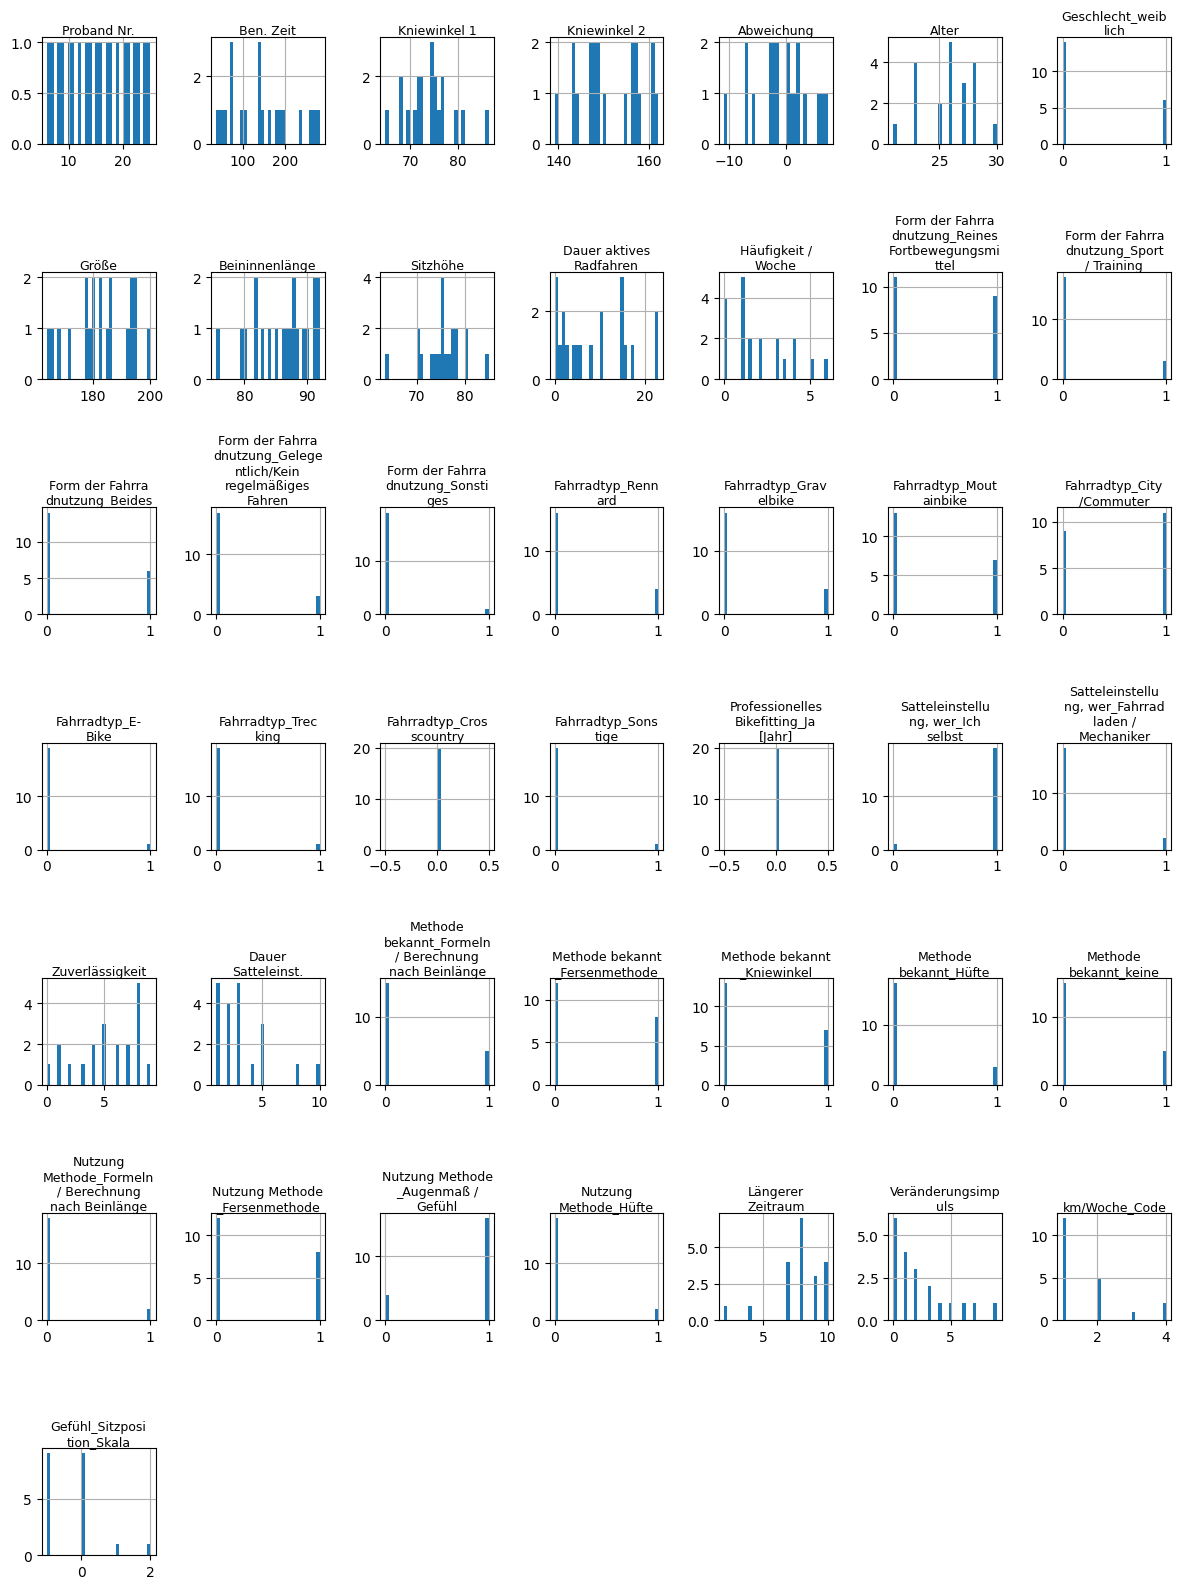

In [238]:
#Histogramme
axes = df.select_dtypes(include="number").hist(bins=30, figsize=(12, 16))

for ax in axes.ravel():
    if ax is not None:
        t = "\n".join(textwrap.wrap(ax.get_title(), width=15))
        ax.set_title(t, fontsize=9, pad=2)  # pad steuert Abstand zum Plot

plt.tight_layout()
plt.subplots_adjust(hspace=1.2)  # <-- mehr Platz zwischen Reihen
plt.show()

In [239]:
df_no_proband = df.drop(columns=["Proband Nr."])

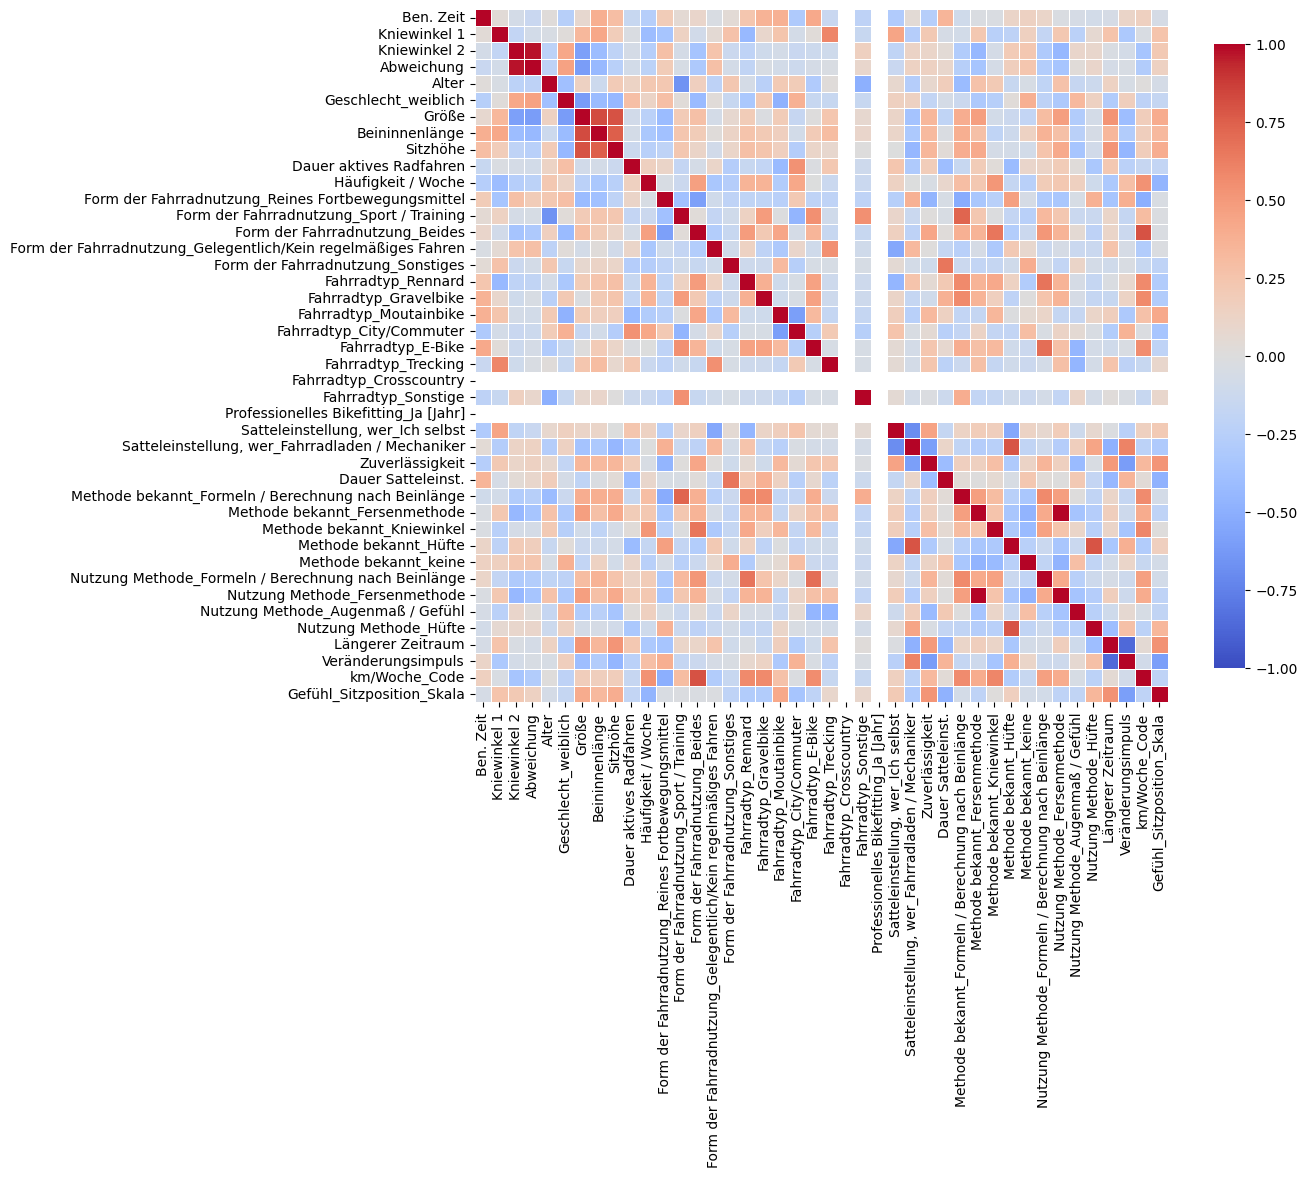

In [240]:
corr_pearson = df_no_proband.corr(method='pearson')

plt.figure(figsize=(12, 9))
ax = sns.heatmap(
    corr_pearson,
    annot=False, fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1, center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.9}
    
    
)

#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
#plt.tight_layout()
plt.show()

In [241]:
top = (
    corr_pearson.where(np.triu(np.ones_like(corr_pearson, dtype=bool), k=1))  # nur oberes Dreieck, ohne Diagonale
        .stack()
        .sort_values(key=lambda s: s.abs(), ascending=False)  # nach Betrag sortieren
)

top.head(15)  

Methode bekannt_Fersenmethode                     Nutzung Methode_Fersenmethode                          1.000000
Kniewinkel 2                                      Abweichung                                             0.974843
Längerer Zeitraum                                 Veränderungsimpuls                                    -0.861095
Größe                                             Beininnenlänge                                         0.822782
Form der Fahrradnutzung_Beides                    km/Woche_Code                                          0.804381
Größe                                             Sitzhöhe                                               0.800494
Satteleinstellung, wer_Fahrradladen / Mechaniker  Methode bekannt_Hüfte                                  0.793492
Methode bekannt_Hüfte                             Nutzung Methode_Hüfte                                  0.793492
Beininnenlänge                                    Sitzhöhe                              

In [242]:
corr_pearson_abweichung = corr_pearson["Abweichung"]
print(corr_pearson_abweichung.reindex(corr_pearson_abweichung.abs().sort_values(ascending=False).index))

Abweichung                                                       1.000000
Kniewinkel 2                                                     0.974843
Größe                                                           -0.608438
Geschlecht_weiblich                                              0.456879
Beininnenlänge                                                  -0.431750
Methode bekannt_Fersenmethode                                   -0.350746
Nutzung Methode_Fersenmethode                                   -0.350746
Form der Fahrradnutzung_Beides                                  -0.311087
km/Woche_Code                                                   -0.285725
Nutzung Methode_Formeln / Berechnung nach Beinlänge             -0.280052
Form der Fahrradnutzung_Gelegentlich/Kein regelmäßiges Fahren    0.277530
Methode bekannt_Formeln / Berechnung nach Beinlänge             -0.254142
Sitzhöhe                                                        -0.244574
Methode bekannt_keine                 

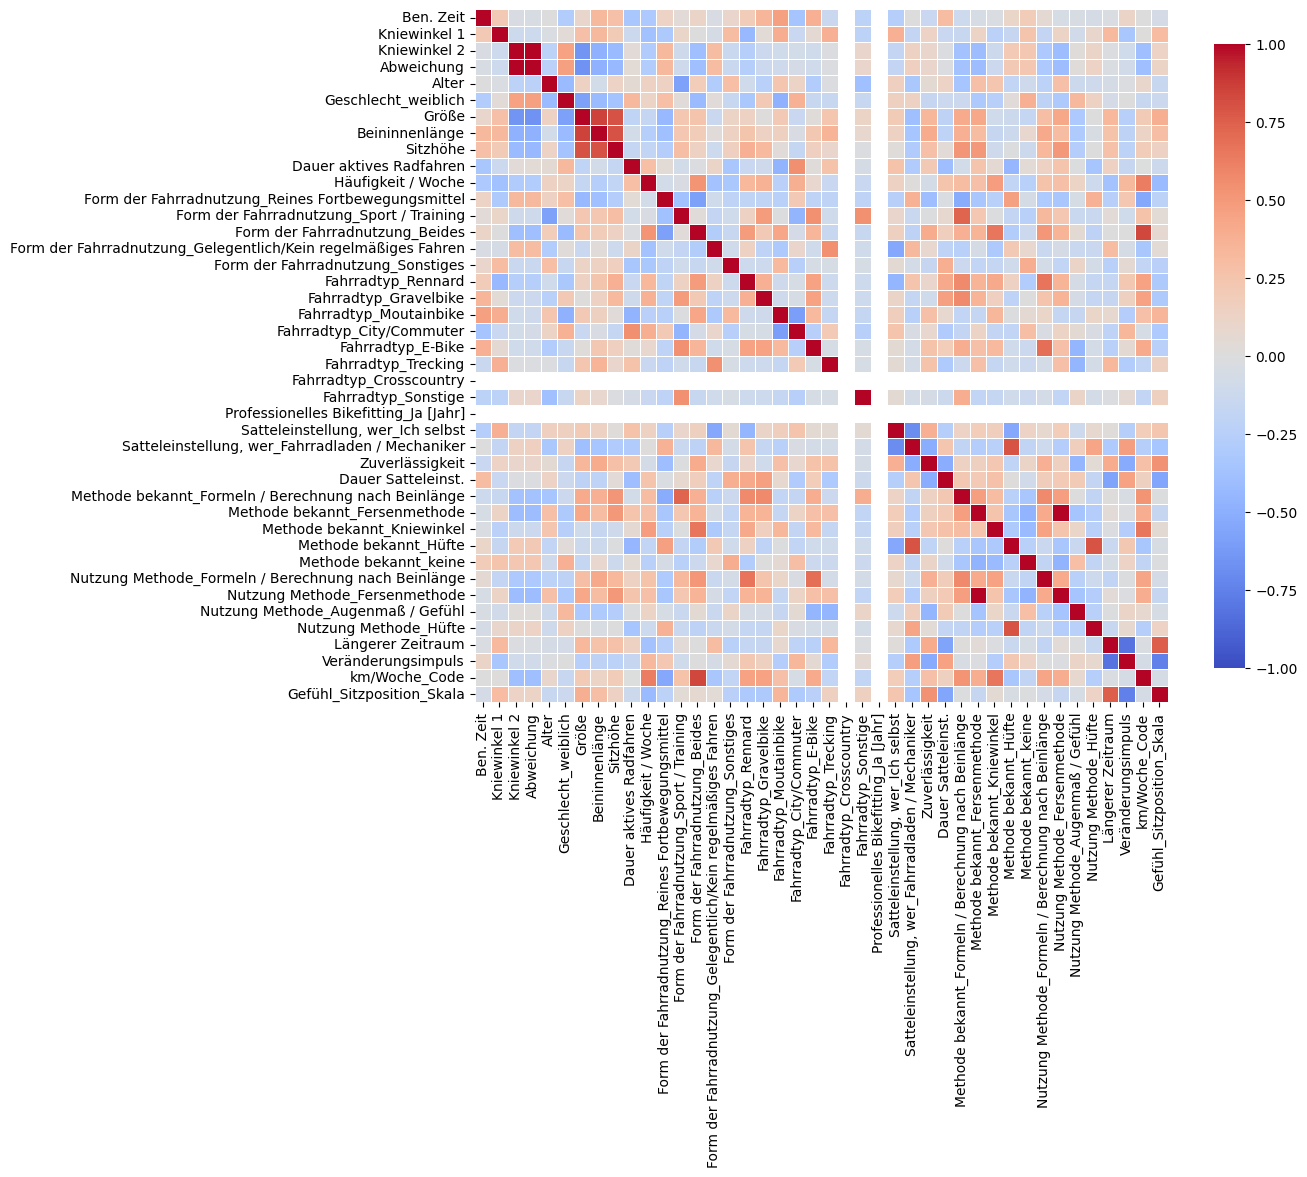

In [243]:
corr_spearman = df_no_proband.corr(method='spearman')

plt.figure(figsize=(12, 9))
ax = sns.heatmap(
    corr_spearman,
    annot=False, fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1, center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.9}
    
    
)

#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
#plt.tight_layout()
plt.show()

In [244]:
top = (
    corr_spearman.where(np.triu(np.ones_like(corr_spearman, dtype=bool), k=1))  # nur oberes Dreieck, ohne Diagonale
        .stack()
        .sort_values(key=lambda s: s.abs(), ascending=False)  # nach Betrag sortieren
)

top.head(15)  

Methode bekannt_Fersenmethode                     Nutzung Methode_Fersenmethode                          1.000000
Kniewinkel 2                                      Abweichung                                             0.999624
Größe                                             Beininnenlänge                                         0.857466
Form der Fahrradnutzung_Beides                    km/Woche_Code                                          0.841428
Längerer Zeitraum                                 Veränderungsimpuls                                    -0.819425
Beininnenlänge                                    Sitzhöhe                                               0.801962
Größe                                             Sitzhöhe                                               0.800076
Satteleinstellung, wer_Fahrradladen / Mechaniker  Methode bekannt_Hüfte                                  0.793492
Methode bekannt_Hüfte                             Nutzung Methode_Hüfte                 

In [245]:
corr_spearmen_abweichung = corr_spearman["Abweichung"]
print(corr_spearmen_abweichung.reindex(corr_spearmen_abweichung.abs().sort_values(ascending=False).index))

Abweichung                                                       1.000000
Kniewinkel 2                                                     0.999624
Größe                                                           -0.661017
Beininnenlänge                                                  -0.485123
Geschlecht_weiblich                                              0.463761
Sitzhöhe                                                        -0.431802
Methode bekannt_Fersenmethode                                   -0.407249
Nutzung Methode_Fersenmethode                                   -0.407249
Form der Fahrradnutzung_Beides                                  -0.397509
km/Woche_Code                                                   -0.391937
Methode bekannt_Formeln / Berechnung nach Beinlänge             -0.370603
Form der Fahrradnutzung_Reines Fortbewegungsmittel               0.322568
Nutzung Methode_Formeln / Berechnung nach Beinlänge             -0.318060
Form der Fahrradnutzung_Gelegentlich/K

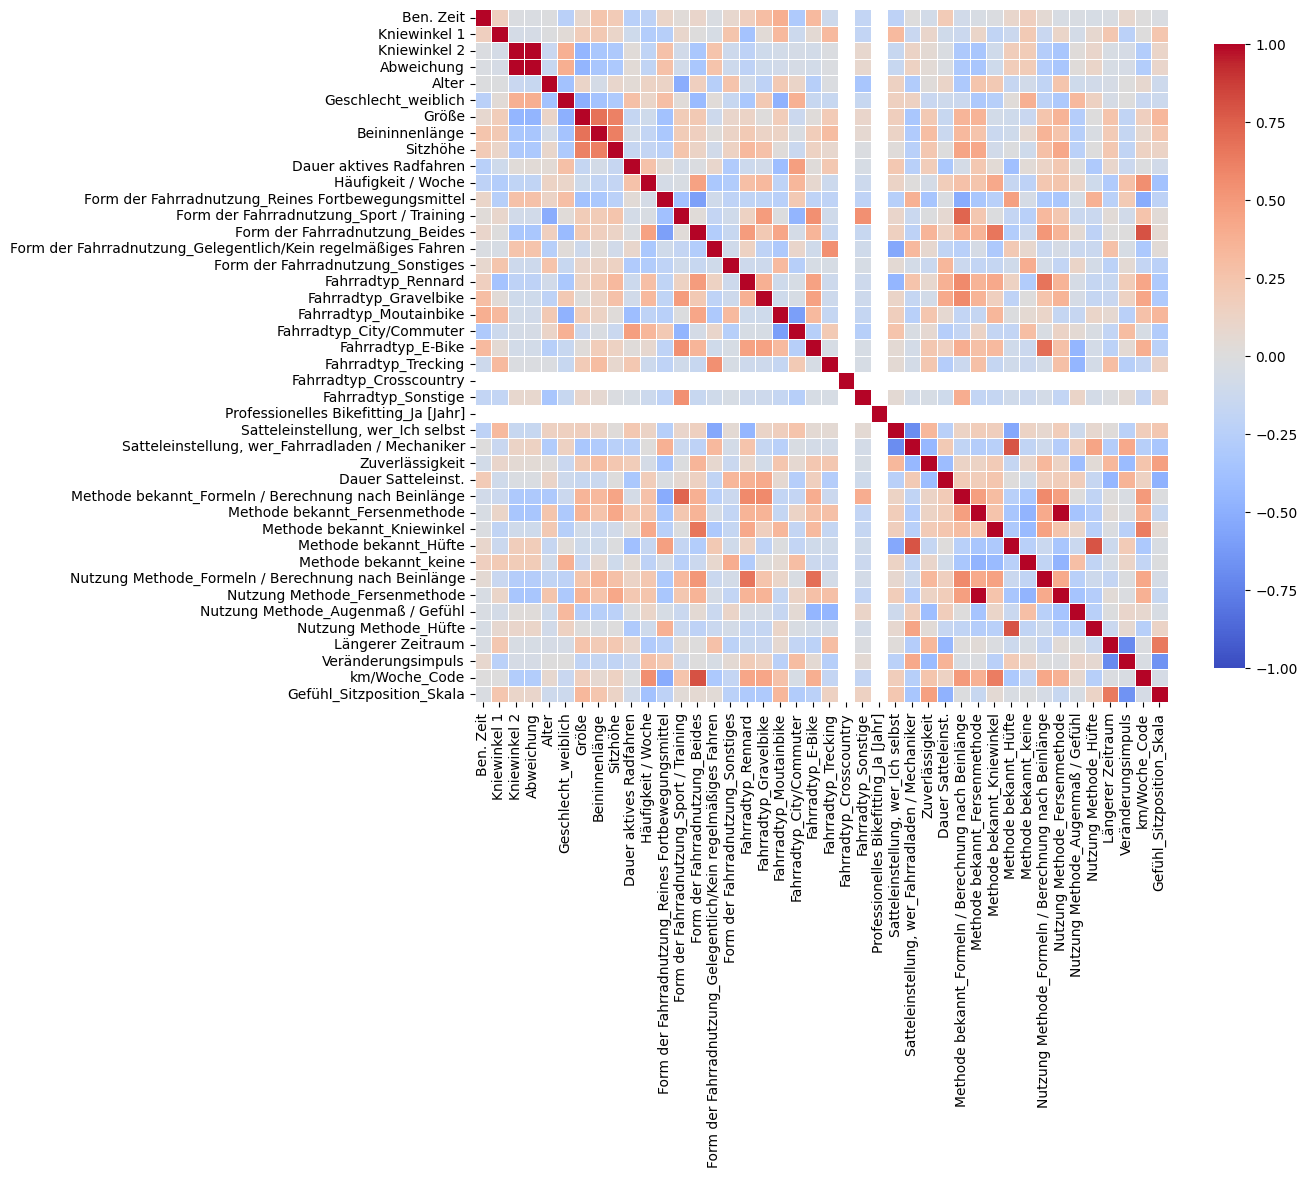

In [246]:
corr_kendall = df_no_proband.corr(method='kendall')

plt.figure(figsize=(12, 9))
ax = sns.heatmap(
    corr_kendall,
    annot=False, fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1, center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.9}
    
    
)

#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
#plt.tight_layout()
plt.show()

In [247]:
top = (
    corr_kendall.where(np.triu(np.ones_like(corr_kendall, dtype=bool), k=1))  # nur oberes Dreieck, ohne Diagonale
        .stack()
        .sort_values(key=lambda s: s.abs(), ascending=False)  # nach Betrag sortieren
)

top.head(15)  

Methode bekannt_Fersenmethode                     Nutzung Methode_Fersenmethode                          1.000000
Kniewinkel 2                                      Abweichung                                             0.997365
Form der Fahrradnutzung_Beides                    km/Woche_Code                                          0.800600
Satteleinstellung, wer_Fahrradladen / Mechaniker  Methode bekannt_Hüfte                                  0.793492
Methode bekannt_Hüfte                             Nutzung Methode_Hüfte                                  0.793492
Form der Fahrradnutzung_Sport / Training          Methode bekannt_Formeln / Berechnung nach Beinlänge    0.727607
Längerer Zeitraum                                 Veränderungsimpuls                                    -0.708886
Satteleinstellung, wer_Ich selbst                 Satteleinstellung, wer_Fahrradladen / Mechaniker      -0.688247
Fahrradtyp_E-Bike                                 Nutzung Methode_Formeln / Berechnung n

In [248]:
corr_kendall_abweichung = corr_kendall["Abweichung"]
print(corr_kendall_abweichung.reindex(corr_kendall_abweichung.abs().sort_values(ascending=False).index))

Abweichung                                                       1.000000
Kniewinkel 2                                                     0.997365
Größe                                                           -0.464015
Geschlecht_weiblich                                              0.388889
Nutzung Methode_Fersenmethode                                   -0.341500
Methode bekannt_Fersenmethode                                   -0.341500
Beininnenlänge                                                  -0.336011
Form der Fahrradnutzung_Beides                                  -0.333333
Sitzhöhe                                                        -0.314677
Methode bekannt_Formeln / Berechnung nach Beinlänge             -0.310771
km/Woche_Code                                                   -0.280552
Form der Fahrradnutzung_Reines Fortbewegungsmittel               0.270491
Nutzung Methode_Formeln / Berechnung nach Beinlänge             -0.266711
Form der Fahrradnutzung_Gelegentlich/K